In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
ICT Capstone 2022 
Electricity Demand Forecasting with Machine Learning

@authors: 
Viriya Duch Sam
Su Hyun Kim
Kim Khanh Tran
Paola Abrogueña

PART 1: Data Understanding & Initial Exploratory Data Analysis 
Version 1.0.6 (Final)

Objective: 
- Retrieving data set 
- Performing data pre-processing
- Define EDA objectives and visualisation
- Conclusion (Data Understanding)

"""

'\nICT Capstone 2022 \nElectricity Demand Forecasting with Machine Learning\n\n@authors: \nViriya Duch Sam\nSu Hyun Kim\nKim Khanh Tran\nPaola Abrogueña\n\nPART 1: Data Understanding & Initial Exploratory Data Analysis \nVersion 1.0.6 (Final)\n\nObjective: \n- Retrieving data set \n- Performing data pre-processing\n- Define EDA objectives and visualisation\n- Conclusion (Data Understanding)\n\n'

# Data Set Description
The *Daily Electricity Price and Demand Data* was retrieved from https://www.kaggle.com/datasets/aramacus/electricity-demand-in-victoria-australia

The dataset covers 2106 days from 01 January 2015 to 06 October 2020.Some intraday intervals RRP was negative, thus energy producers were paying consumers instead of the opposite. Column details are described below:

- date : datetime, the date of the recording
- demand : float, a total daily electricity demand in MWh
- RRP : float, a recommended retail price in AUD/MWh
- demand_pos_RRP : float, a total daily demand at positive RRP in MWh
- RRP_positive : float, an averaged positive RRP, weighted by the corresponding intraday demand in AUD/MWh
- demand_neg_RRP : float, an total daily demand at negative RRP in MWh
- RRP_negative : float, an average negative RRP, weighted by the corresponding intraday demand in AUD/MWh
- frac_at_neg_RRP : float, a fraction of the day when the demand was traded at negative RRP
- min_temperature : float, minimum temperature during the day in Celsius
- max_temperature : float, maximum temperature during the day in Celsius
- solar_exposure : float, total daily sunlight energy in MJ/m^2
- rainfall : float, daily rainfall in mm
- school_day : boolean, if students were at school on that day
- holiday : boolean, if the day was a state or national holiday

# Load Packages
Please ensure the following packages have been pre-installed.

In [2]:
import os

## Datetime manipulation
from datetime import datetime

## Data manipulation
import numpy as np
import pandas as pd 

## Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Retrieval
Downloaded kaggle excel file will be loaded as a dataframe. 

In [3]:
fname = "complete_dataset.csv"
df = pd.read_csv(fname)

# Preview dataset
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


# Data Pre-processing (Cleaning)
This step is done to facilitate the next phase (Exploratory Data Analysis). 

Objectives: 
- Reformat appropriate data types
- Remove missing values

In [4]:
# Check dataset information to determine preprocessing requirements
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


Based on the printed information above, we notice that the following columns have missing entries (i.e., less than 2106 non-null count): solar_exposure and rainfall. Additionally, we may want to reformat date column into DateTime format, as well as school_day and holiday into boolean. 

In [5]:
# We will create a copy dataframe to avoid manipulating the original data set for now.
df_copy = df.copy()

In [6]:
# For rainfall data that are empty, we will assume that it did NOT rain on that day. 
df_copy['rainfall'] = df_copy['rainfall'].fillna(0)

# As for the solar_exposure data that are empty, we will use 'ffill' method to propagate the last valid observation forward to the next valid.
df_copy['solar_exposure'] = df_copy['solar_exposure'].fillna(method = 'ffill')

In [7]:
# Set new data types for relevant columns
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['school_day'] = df_copy['school_day'].replace(['Y', 'N'], [True, False])
df_copy['holiday'] = df_copy['holiday'].replace(['Y', 'N'], [True, False])

df_copy = df_copy.set_index('date').sort_index()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2015-01-01 to 2020-10-06
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   demand           2106 non-null   float64
 1   RRP              2106 non-null   float64
 2   demand_pos_RRP   2106 non-null   float64
 3   RRP_positive     2106 non-null   float64
 4   demand_neg_RRP   2106 non-null   float64
 5   RRP_negative     2106 non-null   float64
 6   frac_at_neg_RRP  2106 non-null   float64
 7   min_temperature  2106 non-null   float64
 8   max_temperature  2106 non-null   float64
 9   solar_exposure   2106 non-null   float64
 10  rainfall         2106 non-null   float64
 11  school_day       2106 non-null   bool   
 12  holiday          2106 non-null   bool   
dtypes: bool(2), float64(11)
memory usage: 201.6 KB


# Exploratory Data Analysis
In this section, we will divide our data exploration process into 3 main objectives:
1. Overall Data Distribution
2. Weather Data Distribution
3. Demand Data Distribution

In [8]:
sns.set_style('darkgrid')

## Overall Data Distribution
Examination of numerical data and categorical data distribution

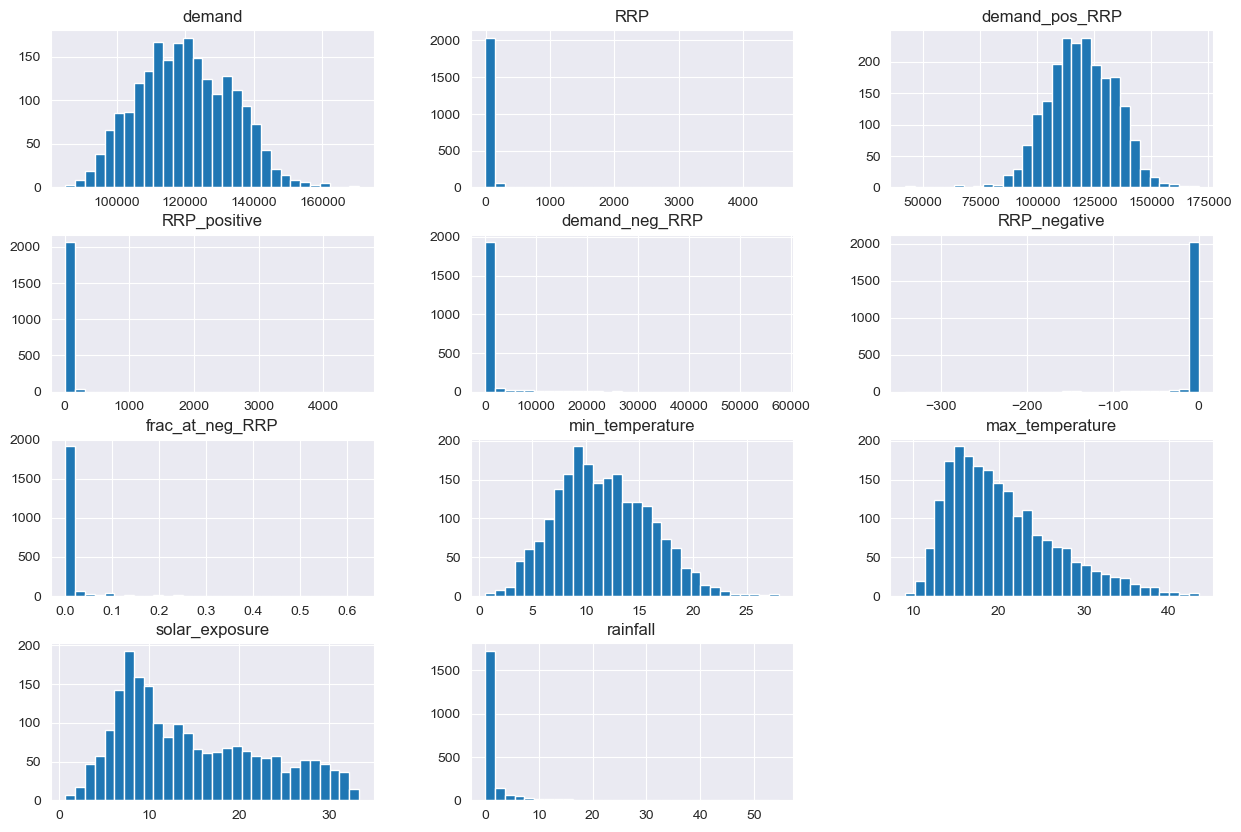

In [9]:
# Numerical data distribution (Histogram)
_ = df_copy.hist(bins= 30, figsize = (15, 10))

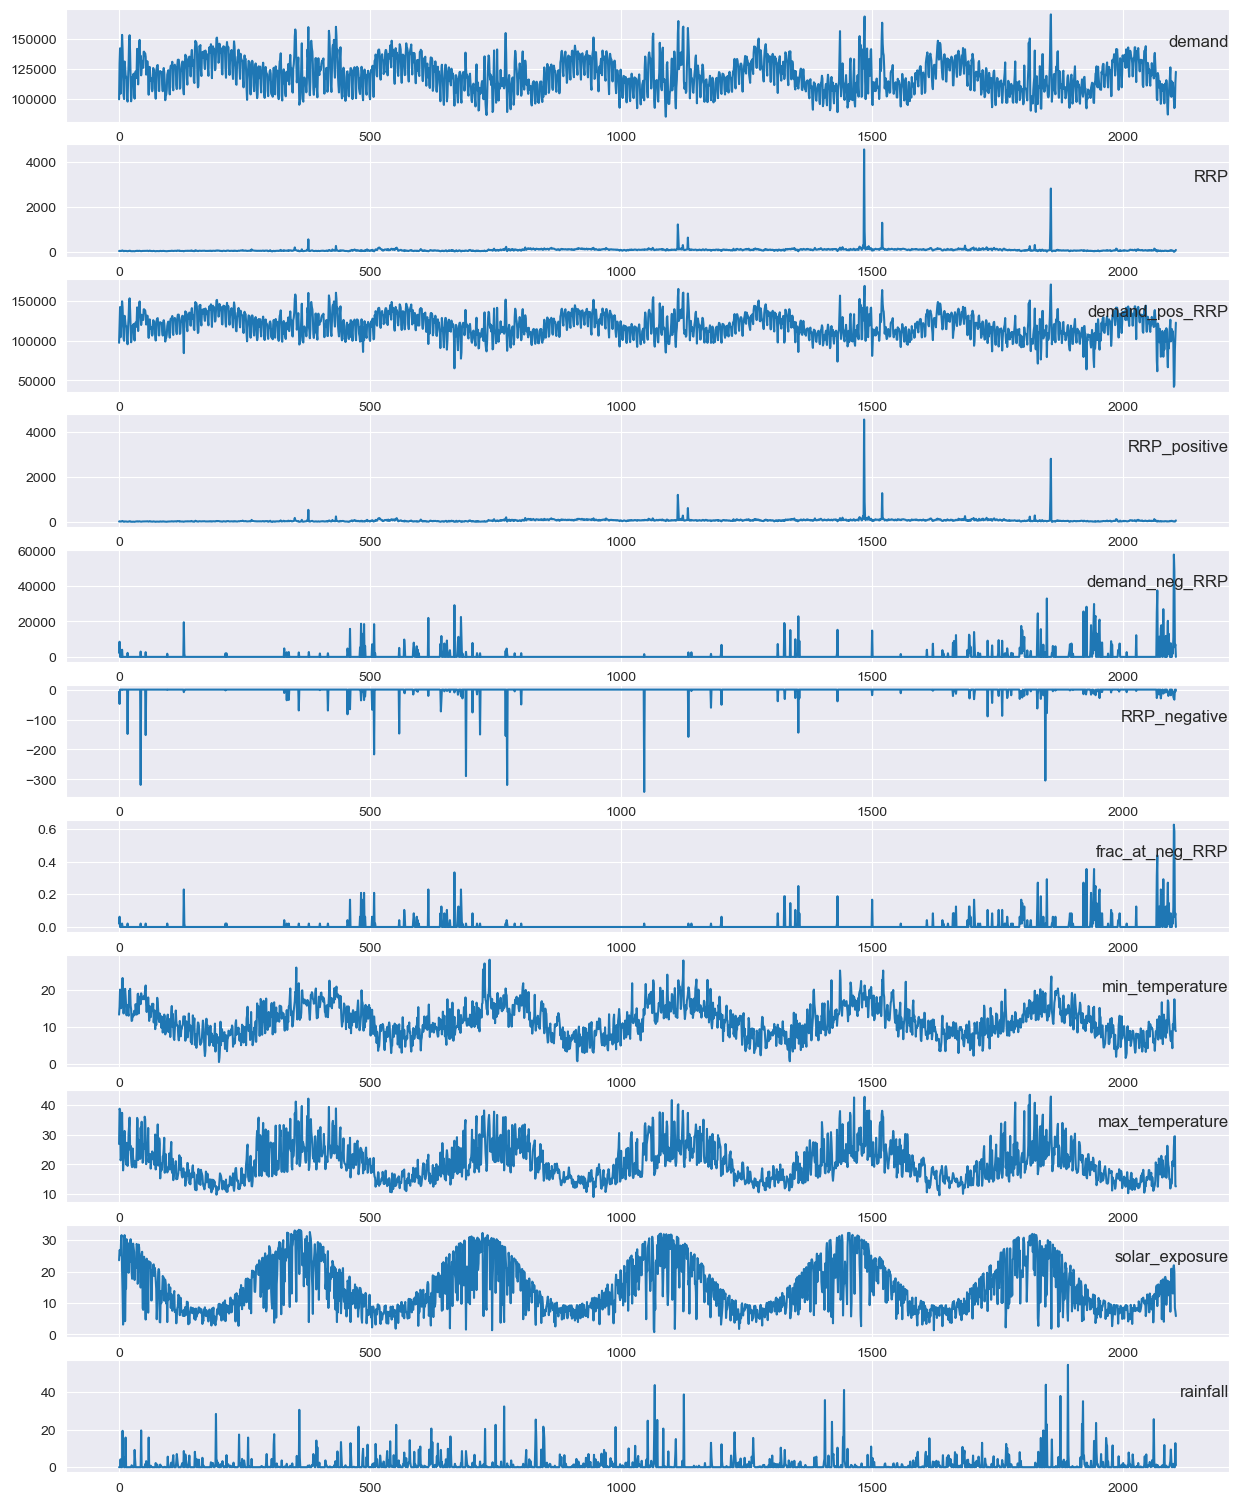

In [10]:
# Numerical Data Distribution (line)
i = 1
groups = list(range(0, 11)) # All numerical columns

plt.figure(figsize = (15, 19))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(df_copy.values[:, group])
	plt.title(df_copy.columns[group], y = 0.6, loc='right')
	i += 1

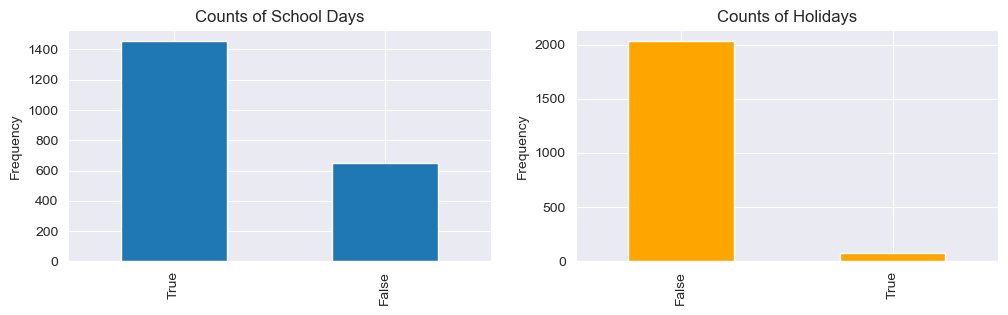

In [11]:
# Categorical Data Distribution
schooldays = df_copy['school_day'].value_counts()
holidays = df_copy['holiday'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
schooldays.plot.bar(ax=ax[0], title='Counts of School Days', ylabel='Frequency')
holidays.plot.bar(color = 'orange', ax=ax[1], title='Counts of Holidays', ylabel='Frequency')
plt.show()

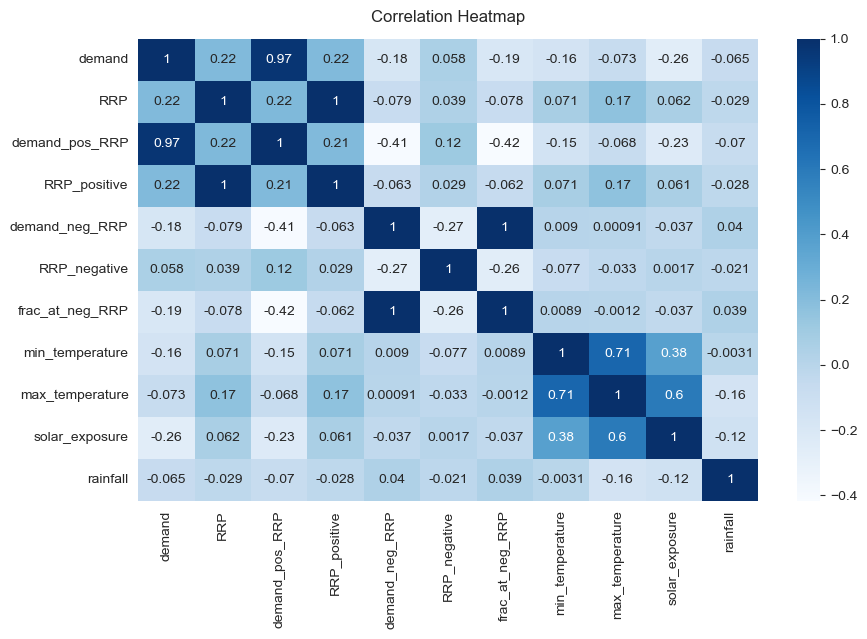

In [12]:
# Features Correlation Heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontsize=12, pad=12);

## Weather Data Distribution
Our data set contains 4 columns of weather data: rainfall, solar_exposure, min_temperature, and max_temperature.

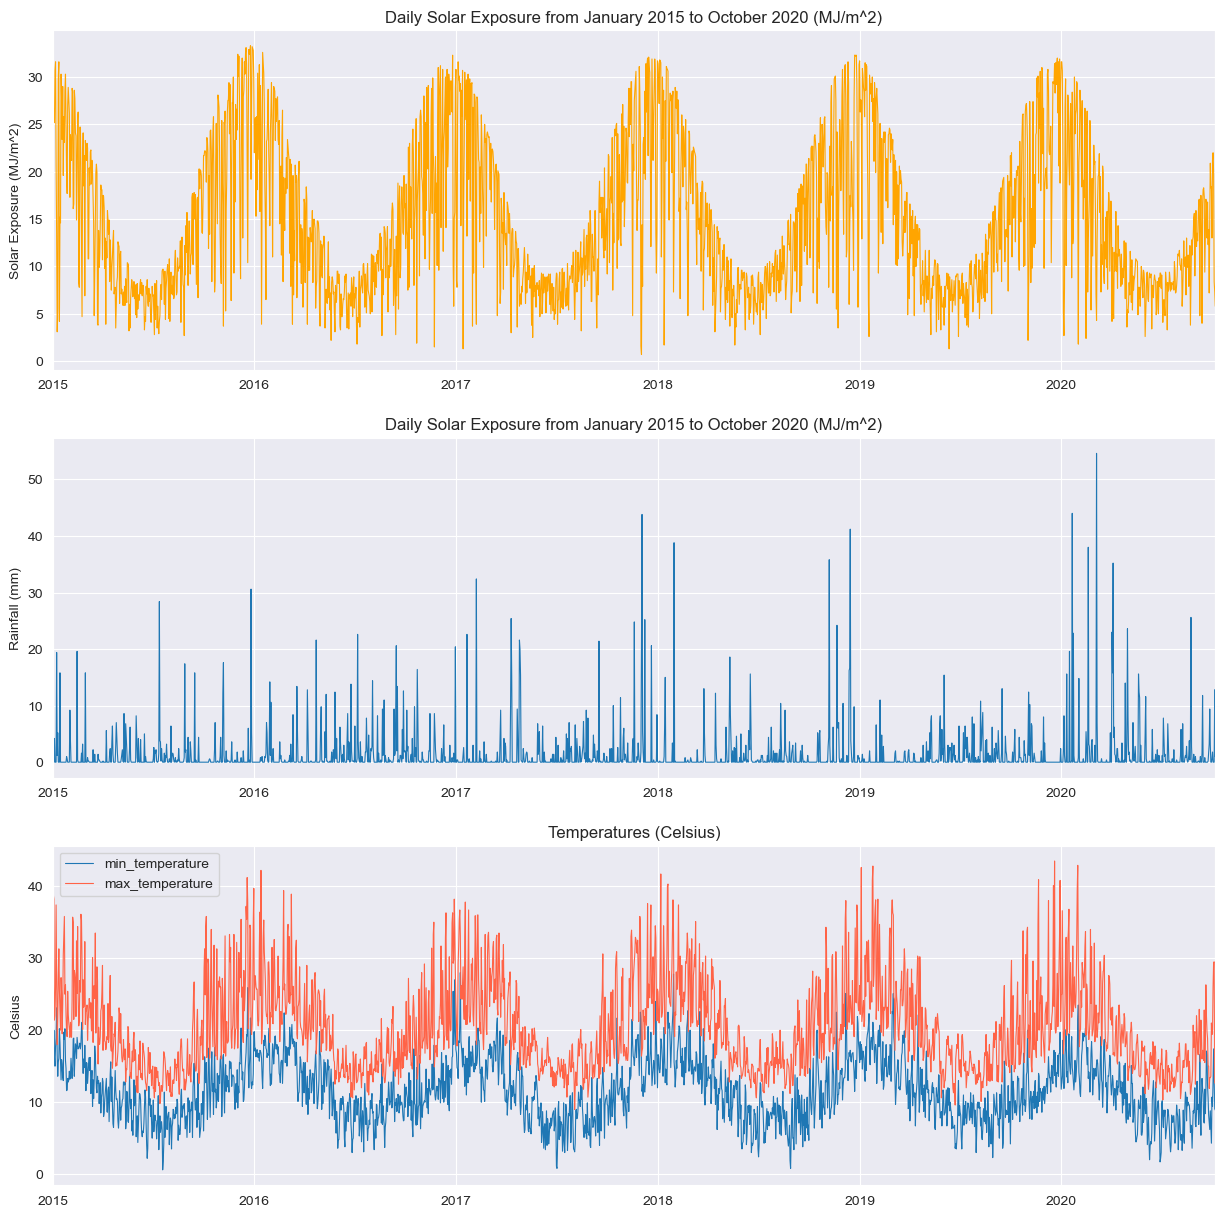

In [13]:
fig, ax = plt.subplots(3, 1, figsize = (15, 15))
plt.subplots_adjust()
df_copy['solar_exposure'].plot(title='Daily Solar Exposure from January 2015 to October 2020 (MJ/m^2)',
                               xlabel = '', ylabel = 'Solar Exposure (MJ/m^2)', lw=0.8, ax=ax[0], color='orange')

df_copy['rainfall'].plot(title='Daily Solar Exposure from January 2015 to October 2020 (MJ/m^2)', 
                         xlabel = '', ylabel = 'Rainfall (mm)', lw=0.8, ax=ax[1])

df_copy['min_temperature'].plot(title='Temperatures (Celsius)', 
                                xlabel = '', ylabel = 'Celsius', lw=0.8, ax=ax[2])
df_copy['max_temperature'].plot(lw=0.8, ax=ax[2], color = 'tomato', xlabel = '')
plt.legend()
plt.show()

## Demand Data Distribution
In this section, we aim to investigate the distribution of demand data according to the following objectives:
- Total Demand Distribution from Jan 2015 to Oct 2020
- 1-Month Zoom Period
- Monthly Demand Distribution Every Year
- Weekly Demand Distribution Every Year
- Seasonal Demand Distribution Every Year
- School Day vs Non-School Day Demand Distribution
- Holiday vs Non-Holiday Demand Distribution
- Demand Distribution during COVID-19 


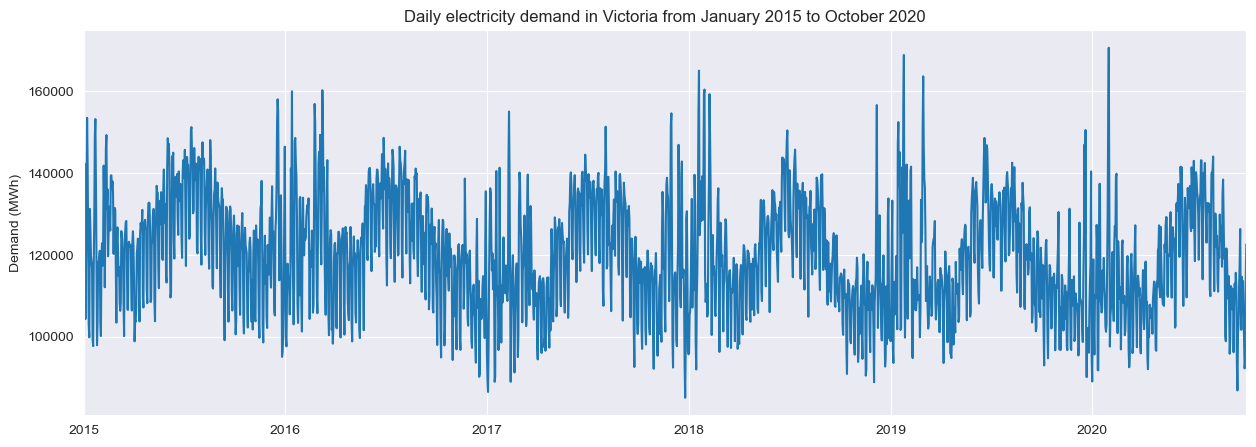

In [14]:
# Daily electricity demand in Victoria from January 2015 to October 2020
plt.figure(figsize = (15, 5))
df_copy.demand.plot(title='Daily electricity demand in Victoria from January 2015 to October 2020',
                    xlabel = '', ylabel = 'Demand (MWh)')
plt.show()

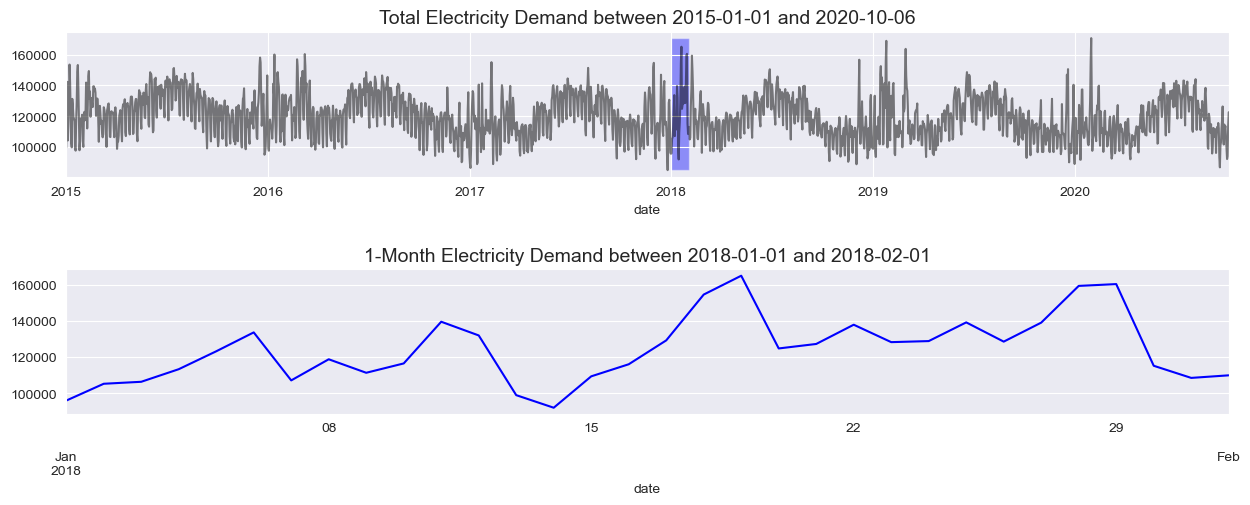

In [16]:
# Zoom in 1 Month of Time Series
zoom = ('2018-01-01','2018-02-01')

fig = plt.figure(figsize=(15, 6))
grid = plt.GridSpec(nrows=6, ncols=6, wspace=1)

total_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[4:6, :])

## Total demand
df_copy.demand.plot(ax=total_ax, color='black', alpha=0.5, linewidth=1.5)
min_y = min(df_copy.demand)
max_y = max(df_copy.demand)
total_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.4, zorder=0)

## Zoomed demand
df_copy.loc[zoom[0]:zoom[1]].demand.plot(ax=zoom_ax, color='blue')

total_ax.set_title(f'Total Electricity Demand between {df_copy.index.date.min()} and {df_copy.index.date.max()}', fontsize=14)
zoom_ax.set_title(f'1-Month Electricity Demand between {zoom[0]} and {zoom[1]}', fontsize=14)

plt.show()

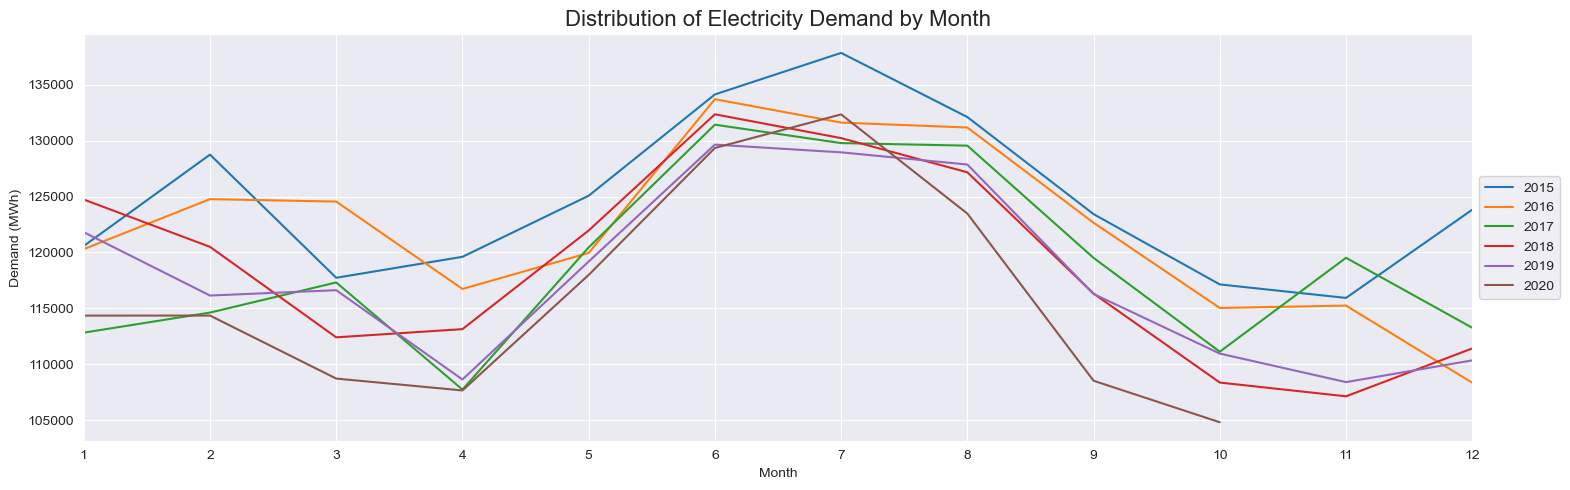

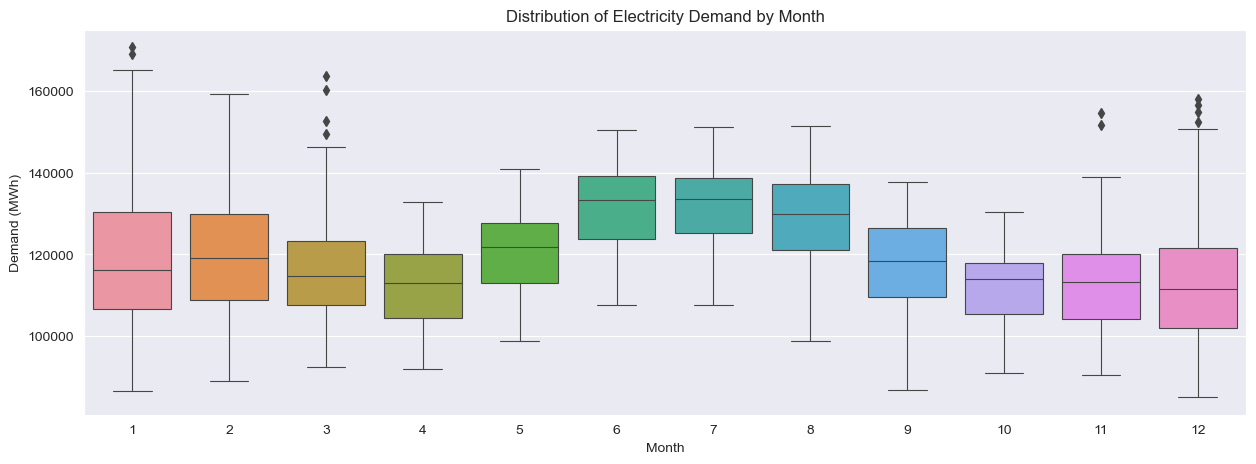

In [17]:
# Monthly Demand Distribution Every Year
month_index = df_copy.index.month
months = list(df_copy.index.month.unique())
first_month = min(df_copy.index.month.unique())
last_month = max(df_copy.index.month.unique())

df_pivot = pd.pivot_table(df_copy, index = month_index, columns = df_copy.index.year, values='demand')
ax = df_pivot.plot(figsize=(15, 5),  ylabel = 'Demand (MWh)', xlabel = 'Month', 
                   xticks = months,
                   xlim = [first_month, last_month])
ax.set_title('Distribution of Electricity Demand by Month', fontsize=16)
ax.figure.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## =============================================================================
# Boxplot Examination
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = month_index, y = df_copy.demand, linewidth = 0.8, ax = ax)
ax.set_xlabel('Month')
ax.set_ylabel('Demand (MWh)')
ax.set_title('Distribution of Electricity Demand by Month', fontsize = 12)
plt.show()

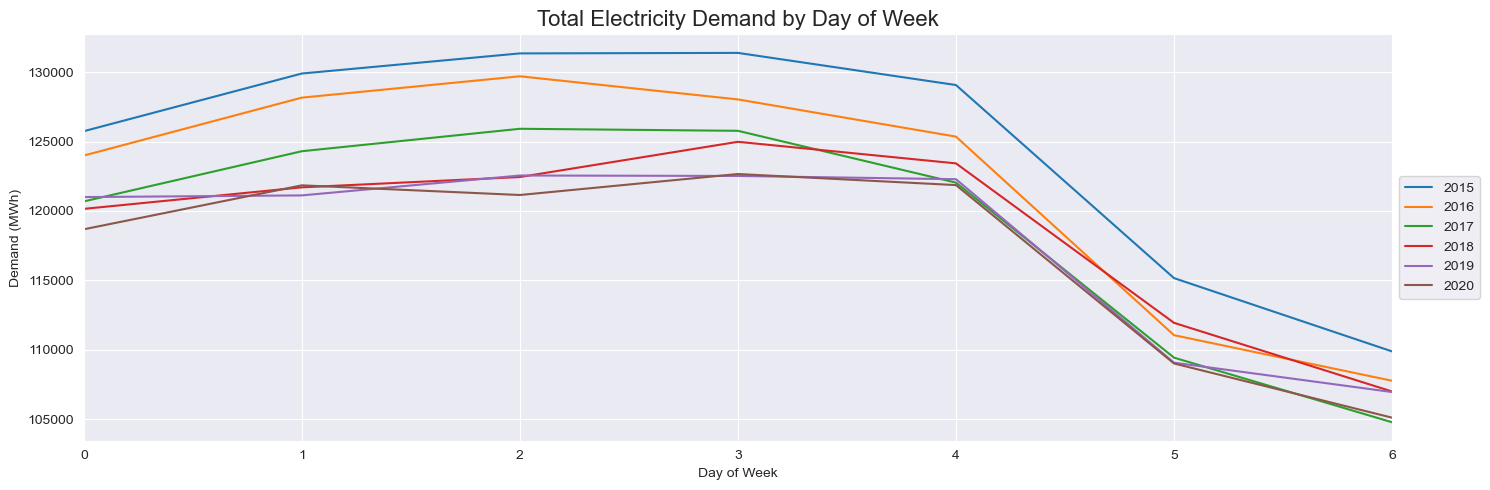

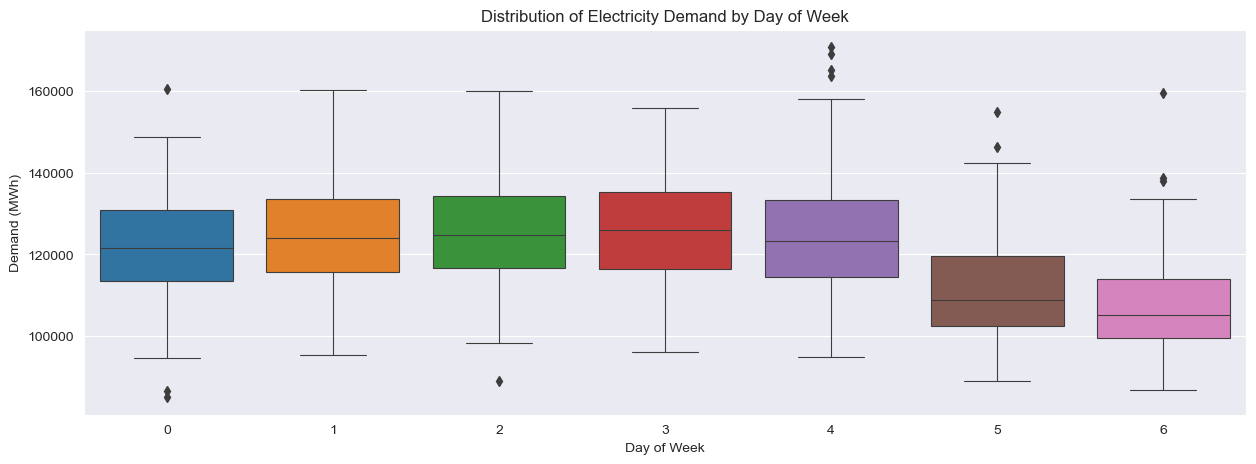

In [18]:
# Weekly Demand Distribution Every Year
weekday_index = df_copy.index.dayofweek
weekday = list(df_copy.index.dayofweek.unique())
first_dow = min(df_copy.index.dayofweek.unique())
last_dow = max(df_copy.index.dayofweek.unique())

df_pivot = pd.pivot_table(df_copy, index = weekday_index, columns = df_copy.index.year, values='demand')
ax = df_pivot.plot(figsize=(15, 5), ylabel = 'Demand (MWh)', 
                   xlabel = 'Day of Week',
                   xlim = [first_dow, last_dow])
ax.set_title("Total Electricity Demand by Day of Week", fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.figure.tight_layout()
plt.show()

## =============================================================================
# Boxplot Examination
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = weekday_index, y = df_copy.demand, linewidth = 0.8, ax = ax)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Demand (MWh)')
ax.set_title('Distribution of Electricity Demand by Day of Week', fontsize = 12)
plt.show()

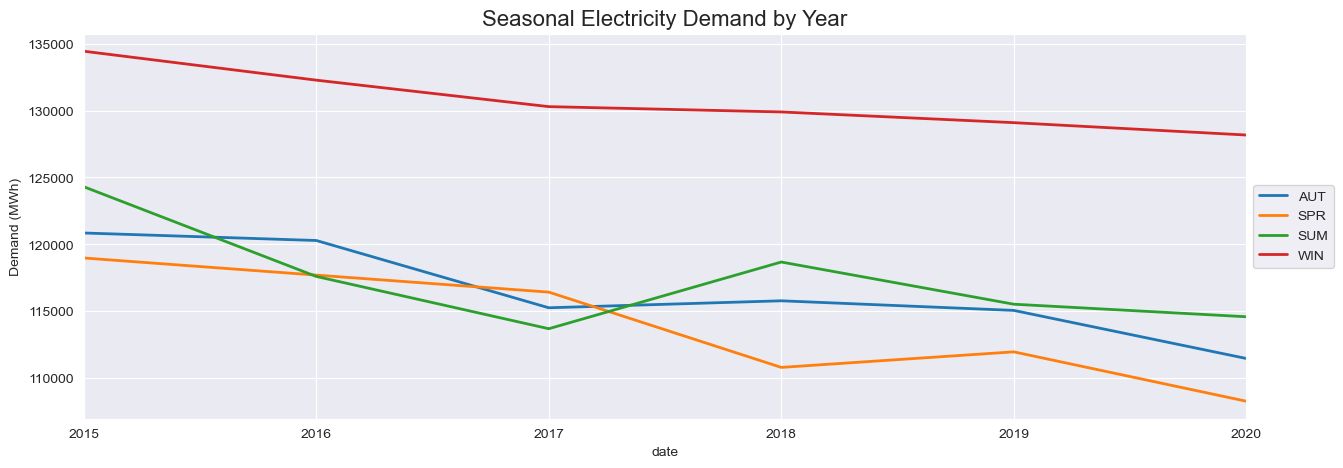

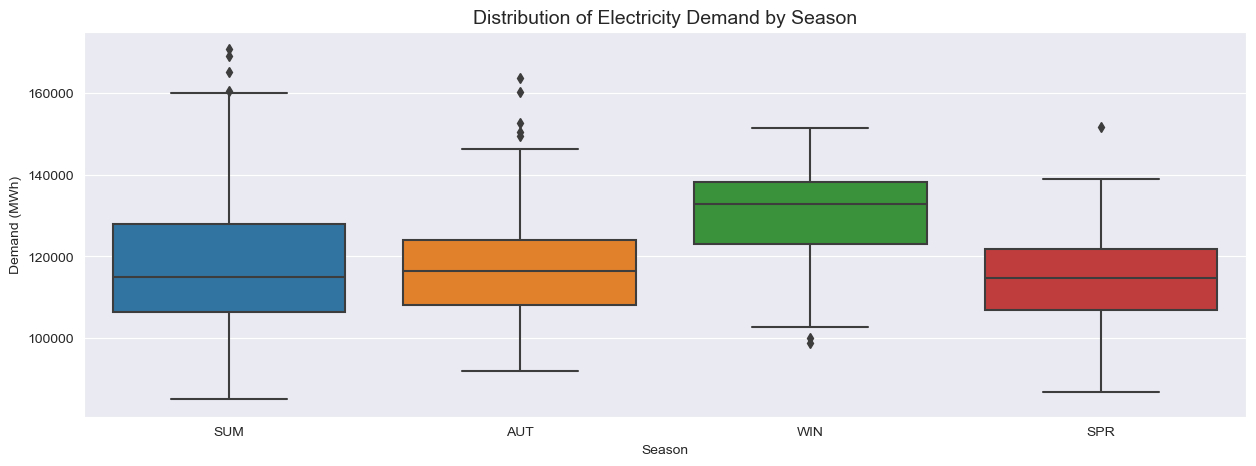

In [19]:
# Seasonal Demand Distribution Every Year

##Create new variable for Seasons
season_df = df_copy.copy()
_condition_winter = (season_df.index.month>=6)&(season_df.index.month<=8)
_condtion_spring = (season_df.index.month>=9)&(season_df.index.month<=11)
_condition_autumn = (season_df.index.month>=3)&(season_df.index.month<=5)
_condition_summer = (season_df.index.month>=1)@(season_df.index.month<=2)

season_df['season'] = np.where(_condition_winter,'WIN',
                               np.where(_condtion_spring,'SPR',
                                        np.where(_condition_autumn,'AUT',
                                                 np.where(_condition_summer,'SUM',
                                                          np.nan))))
season_df['season'] = season_df['season'].shift(-1).fillna(method='ffill')

# Daily electricity demand per season (by year)
first_year = min(df_copy.index.year.unique())
last_year = max(df_copy.index.year.unique())

df_pivot = pd.pivot_table(season_df, index = season_df.index.year, columns='season', values='demand')
ax = df_pivot.plot(figsize=(15, 5), 
                   lw = 2, 
                   ylabel = 'Demand (MWh)',
                   xlim = [first_year, last_year])
ax.set_title('Seasonal Electricity Demand by Year', fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## =============================================================================
# Boxplot Examination
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = season_df ['season'], 
                y = season_df ['demand'],
                ax = ax)
ax.set_xlabel('Season')
ax.set_ylabel('Demand (MWh)')
ax.set_title('Distribution of Electricity Demand by Season', fontsize = 14)
plt.show()

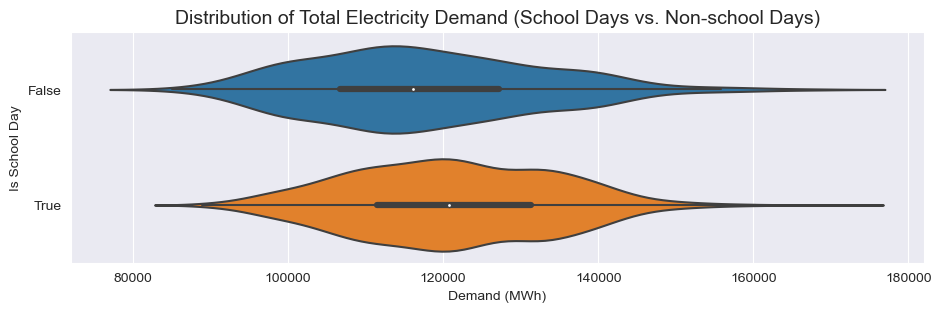

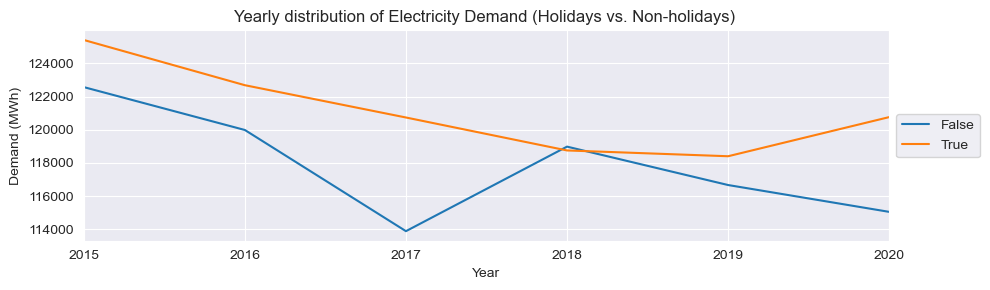

In [20]:
# School Day vs Non-School Day Demand Distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 3))
sns.violinplot(x = 'demand', y  = 'school_day',
               data = df_copy.assign(school_day = df_copy.school_day.astype(str)),
               ax = ax)
ax.set_title('Distribution of Total Electricity Demand (School Days vs. Non-school Days)', fontsize = 14)
ax.set_xlabel('Demand (MWh)')
ax.set_ylabel('Is School Day');

## =============================================================================
# Yearly Distribution Examination
first_year = min(df_copy.index.year.unique())
last_year = max(df_copy.index.year.unique())

df_pivot = pd.pivot_table(df_copy, index = df_copy.index.year, columns='school_day', values='demand')
ax = df_pivot.plot(title='Yearly distribution of Electricity Demand (Holidays vs. Non-holidays) ', 
                   figsize=(10, 3),
                   xlim = [first_year, last_year])
plt.xlabel('Year')
plt.ylabel('Demand (MWh)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.figure.tight_layout()
plt.show()

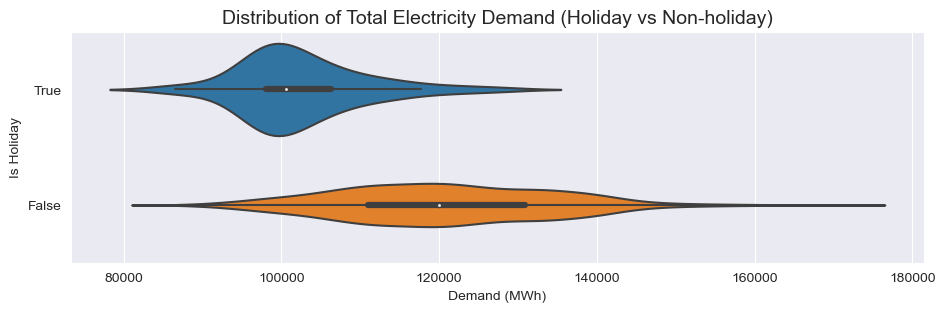

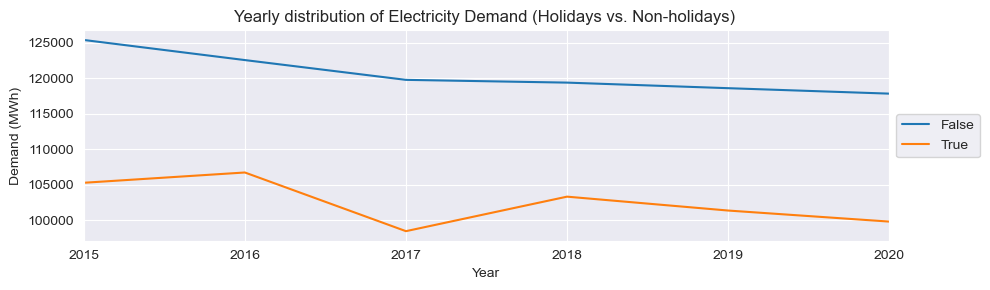

In [21]:
# Holiday vs Non-holiday Demand Distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 3))
sns.violinplot(x = 'demand', y  = 'holiday',
               data = df_copy.assign(holiday = df_copy.holiday.astype(str)),
               ax = ax)
ax.set_title('Distribution of Total Electricity Demand (Holiday vs Non-holiday)', fontsize = 14)
ax.set_xlabel('Demand (MWh)')
ax.set_ylabel('Is Holiday');

## =============================================================================
# Yearly Distribution Examination
first_year = min(df_copy.index.year.unique())
last_year = max(df_copy.index.year.unique())

df_pivot = pd.pivot_table(df_copy, index = df_copy.index.year, columns='holiday', values='demand')
ax = df_pivot.plot(title='Yearly distribution of Electricity Demand (Holidays vs. Non-holidays) ', 
                   figsize=(10, 3),
                   xlim = [first_year, last_year])
plt.xlabel('Year')
plt.ylabel('Demand (MWh)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.figure.tight_layout()
plt.show()

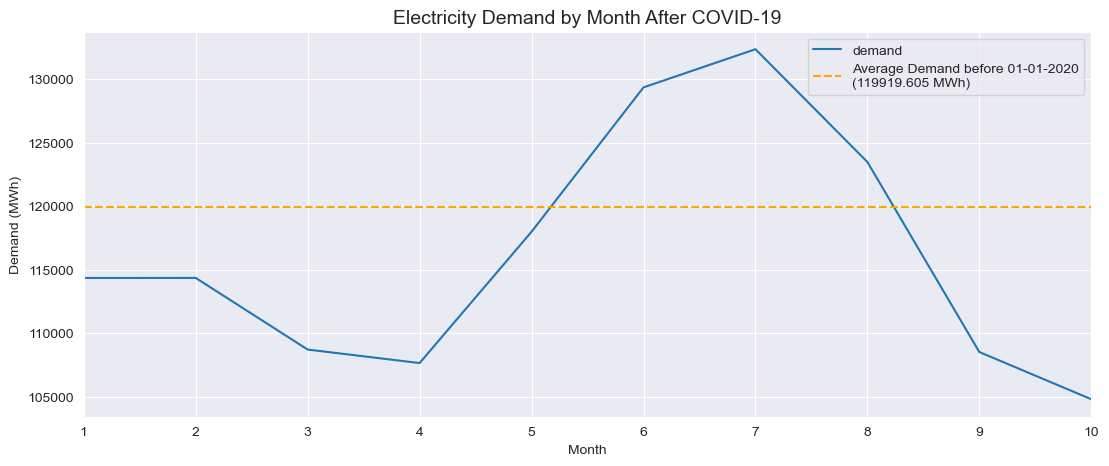

In [22]:
# Demand Distribution during COVID-19

## Assuming COVID commences 01-01-2020
split_date = "2019-12-31"

df_beforeCovid = df_copy.loc[df_copy.index < split_date]
df_afterCovid = df_copy.loc[df_copy.index > split_date]

# Calculate Average Demand Pre-COVID19
avgDemandBefore = df_beforeCovid.demand.median()

first_month = min(df_afterCovid.index.month.unique())
last_month = max(df_afterCovid.index.month.unique())

df_pivot = pd.pivot_table(df_afterCovid, index = df_afterCovid.index.month, values='demand')
ax = df_pivot.plot(figsize=(13, 5),  
                   ylabel = 'Demand (MWh)', 
                   xlabel = 'Month',
                   xlim = [first_month,last_month])
#add horizontal line at mean value of avgDemandBefore
plt.axhline(y = avgDemandBefore, color='orange', linestyle='--', 
            label = f'Average Demand before 01-01-2020\n({avgDemandBefore} MWh)')
ax.set_title('Electricity Demand by Month After COVID-19', fontsize=14)
plt.legend()

plt.show()

# Export Clean Data Set

In [26]:
# Export clean data frame to new csv file for next task
df_copy.to_csv('clean_data.csv')